In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def function(x):
    y = 0.5*x**2 + 3*x + 10
    return y

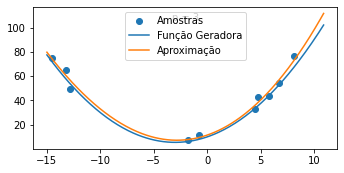

In [45]:
np.random.seed(0)

N = 10
maxInterval = 10
minInterval = -15

# media, desvio padrao
mu, sigma = 0,4
noise = np.random.normal(mu, sigma, N)

x = ((maxInterval - minInterval)*np.random.rand(N) + minInterval)
yr = function(x) + noise
x_ls = np.arange(minInterval, maxInterval + 1, 0.1)
xgrid = np.arange(minInterval, maxInterval + 1, 0.1)

ygrid =  function(xgrid)
# matriz 1 linha e N colunas
H = np.ones((1,N))
Hgrid = np.ones((1, np.shape(xgrid)[0]))

fig = plt.figure(constrained_layout = False)
fig.set_figheight(12)
fig.set_figwidth(12)

#%%
n = 3

for i in range(n): # adicionar uma linha com os valores de X
    H = np.append([x**(i+1)], H, axis = 0)

    # transposta de H, para ficar na maneira que queremos, coluna
    # calcula a pseudoinversa de H
    # w -> peso
    w = np.dot(np.linalg.pinv(np.transpose(H)), yr)

    # y chapeu, funcao aproximada
    yhat = np.dot(np.transpose(H), w)

    # gerar grid para mostar as funções
    Hgrid = np.append([xgrid**(i+1)], Hgrid, axis = 0)
    yhatgrid = np.dot(np.transpose(Hgrid), w)

ax = fig.add_subplot(4,2,1)
ax.scatter(x, yr, label = 'Amostras')
ax.plot(xgrid, ygrid, label = 'Função Geradora')
ax.plot(xgrid, yhatgrid, label = 'Aproximação')
ax.set_label('y')

if np.min(yhatgrid) < 0:
    ax.axis(ymin = -200, ymax = 150)

ax.text(.5,.9, 'p = ' + str(n), horizontalalignment = 'center', transform = ax.transAxes)
ax.legend()
plt.show()